# Activity 1 and 2 using networkx library

Visiting Node 0
Visiting Node 1
Current maximum depth reached, returning...
Visiting Node 2
Current maximum depth reached, returning...
Increasing depth to 2
Visiting Node 0
Visiting Node 1
Visiting Node 3
Current maximum depth reached, returning...
Visiting Node 4
Current maximum depth reached, returning...
Visiting Node 2
Visiting Node 5
Current maximum depth reached, returning...
Visiting Node 6
Found the node we're looking for!
Path to target node 6: [0, 2, 6]


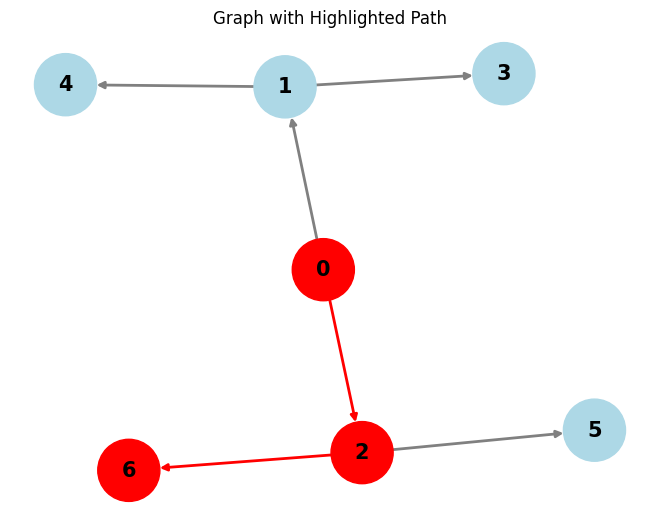

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def iterative_deepening_dfs(graph, start, target):
    """
    Implementation of iterative deepening DFS (depth-first search) algorithm using networkx.
    Given a start node, this returns the path from the start node to the target node (or None if it doesn't exist).
    :param graph: The graph to search in.
    :param start: The node to start the search from.
    :param target: The value to search for.
    :return: The path from the start node to the target node or None if it doesn't exist.
    """
    depth = 1
    bottom_reached = False  # Variable to keep track if we have reached the bottom of the graph
    while not bottom_reached:
        result, bottom_reached, path = iterative_deepening_dfs_rec(graph, start, target, 0, depth, [start])
        if result is not None:
            return path
        depth *= 2
        print("Increasing depth to " + str(depth))
    return None

def iterative_deepening_dfs_rec(graph, node, target, current_depth, max_depth, path):
    print("Visiting Node " + str(node))
    if node == target:
        print("Found the node we're looking for!")
        return node, True, path

    if current_depth == max_depth:
        print("Current maximum depth reached, returning...")
        if any(graph.neighbors(node)):
            return None, False, path
        else:
            return None, True, path

    bottom_reached = True
    for neighbor in graph.neighbors(node):
        result, bottom_reached_rec, new_path = iterative_deepening_dfs_rec(graph, neighbor, target, current_depth + 1, max_depth, path + [neighbor])
        if result is not None:
            return result, True, new_path
        bottom_reached = bottom_reached and bottom_reached_rec

    return None, bottom_reached, path

# Example usage
G = nx.DiGraph()
edges = [
    (0, 1),
    (0, 2),
    (1, 3),
    (1, 4),
    (2, 5),
    (2, 6)
]
G.add_edges_from(edges)

# Find the path using IDDFS
start_node = 0
target_node = 6
path = iterative_deepening_dfs(G, start_node, target_node)

# Visualize the graph with the highlighted path
pos = nx.spring_layout(G)  # Layout for positioning nodes

# Default node and edge colors
node_colors = ['lightblue' for _ in G.nodes()]
edge_colors = ['gray' for _ in G.edges()]

if path is not None:
    print(f"Path to target node {target_node}: {path}")

    # Highlight nodes and edges in the path
    path_edges = list(zip(path[:-1], path[1:]))  # Get edges in the path
    for node in path:
        node_colors[node] = 'red'  # Highlight nodes in the path
    for i, edge in enumerate(G.edges()):
        if edge in path_edges:
            edge_colors[i] = 'red'  # Highlight edges in the path
else:
    print("Target not found")

# Draw the graph with highlighted path
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=15, font_weight='bold', edge_color=edge_colors, width=2)
plt.title("Graph with Highlighted Path")
plt.show()

# Activity 1 and 2 without using networkx library

In [6]:
def iterative_deepening_dfs(start, target):
    """
    Implementation of iterative deepening DFS (depth-first search) algorithm to find the shortest path from a start to a target node.
    Given a start node, this returns the node in the tree below the start node with the target value (or null if it doesn't exist).
    Runs in O(b^d), where b is the branching factor and d is the depth.
    :param start: the node to start the search from
    :param target: the value to search for
    :return: The node containing the target value or null if it doesn't exist.
    """
    depth = 1
    bottom_reached = False  # Variable to keep track if we have reached the bottom of the tree
    while not bottom_reached:
        # One of the "end nodes" of the search with this depth has to still have children and set this to False again
        result, bottom_reached = iterative_deepening_dfs_rec(start, target, 0, depth)
        if result is not None:
            # We've found the goal node while doing DFS with this max depth
            return result
        # We haven't found the goal node, but there are still deeper nodes to search through
        depth *= 2
        print("Increasing depth to " + str(depth))

    # Bottom reached is True.
    # We haven't found the node and there were no more nodes that still have children to explore at a higher depth.
    return None

def iterative_deepening_dfs_rec(node, target, current_depth, max_depth):
    print("Visiting Node " + str(node["value"]))
    if node["value"] == target:
        # We have found the goal node we're searching for
        print("Found the node we're looking for!")
        return node, True

    if current_depth == max_depth:
        print("Current maximum depth reached, returning...")
        # We have reached the end for this depth...
        if len(node["children"]) > 0:
            # ...but we have not yet reached the bottom of the tree
            return None, False
        else:
            return None, True

    # Recurse with all children
    bottom_reached = True
    for child in node["children"]:
        result, bottom_reached_rec = iterative_deepening_dfs_rec(child, target, current_depth + 1, max_depth)
        if result is not None:
            # We've found the goal node while going down that child
            return result, True
        bottom_reached = bottom_reached and bottom_reached_rec

    # We've gone through all children and not found the goal node
    return None, bottom_reached

# Example usage
start = {
    "value": 0, "children": [
        {"value": 1, "children": [
            {"value": 3, "children": []},
            {"value": 4, "children": []}
        ]},
        {"value": 2, "children": [
            {"value": 5, "children": []},
            {"value": 6, "children": []}
        ]}
    ]
}

result = iterative_deepening_dfs(start, 6)
if result:
    print(result["value"])
else:
    print("Target not found")

Visiting Node 0
Visiting Node 1
Current maximum depth reached, returning...
Visiting Node 2
Current maximum depth reached, returning...
Increasing depth to 2
Visiting Node 0
Visiting Node 1
Visiting Node 3
Current maximum depth reached, returning...
Visiting Node 4
Current maximum depth reached, returning...
Visiting Node 2
Visiting Node 5
Current maximum depth reached, returning...
Visiting Node 6
Found the node we're looking for!
6


# Lab task 1

Visiting Node Arad
Visiting Node Zerind
Current maximum depth reached, returning...
Visiting Node Sibiu
Current maximum depth reached, returning...
Visiting Node Timisoara
Current maximum depth reached, returning...
Increasing depth to 2
Visiting Node Arad
Visiting Node Zerind
Visiting Node Arad
Current maximum depth reached, returning...
Visiting Node Oradea
Current maximum depth reached, returning...
Visiting Node Sibiu
Visiting Node Arad
Current maximum depth reached, returning...
Visiting Node Oradea
Current maximum depth reached, returning...
Visiting Node Fagaras
Current maximum depth reached, returning...
Visiting Node Rimnicu Vilcea
Current maximum depth reached, returning...
Visiting Node Timisoara
Visiting Node Arad
Current maximum depth reached, returning...
Visiting Node Lugoj
Current maximum depth reached, returning...
Increasing depth to 4
Visiting Node Arad
Visiting Node Zerind
Visiting Node Arad
Visiting Node Zerind
Visiting Node Arad
Current maximum depth reached, retu

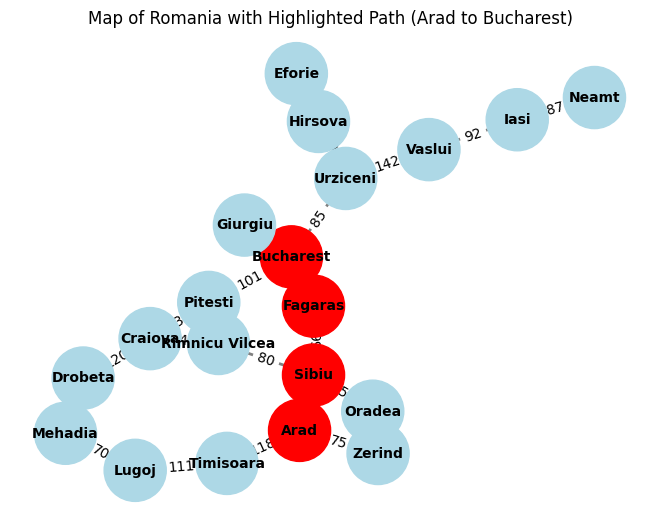

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def iterative_deepening_dfs(graph, start, target):
    """
    Implementation of iterative deepening DFS (depth-first search) algorithm using networkx.
    Given a start node, this returns the path from the start node to the target node (or None if it doesn't exist).
    :param graph: The graph to search in.
    :param start: The node to start the search from.
    :param target: The value to search for.
    :return: The path from the start node to the target node or None if it doesn't exist.
    """
    depth = 1
    bottom_reached = False  # Variable to keep track if we have reached the bottom of the graph
    while not bottom_reached:
        result, bottom_reached, path = iterative_deepening_dfs_rec(graph, start, target, 0, depth, [start])
        if result is not None:
            return path
        depth *= 2
        print("Increasing depth to " + str(depth))
    return None

def iterative_deepening_dfs_rec(graph, node, target, current_depth, max_depth, path):
    print("Visiting Node " + str(node))
    if node == target:
        print("Found the node we're looking for!")
        return node, True, path

    if current_depth == max_depth:
        print("Current maximum depth reached, returning...")
        if any(graph.neighbors(node)):
            return None, False, path
        else:
            return None, True, path

    bottom_reached = True
    for neighbor in graph.neighbors(node):
        result, bottom_reached_rec, new_path = iterative_deepening_dfs_rec(graph, neighbor, target, current_depth + 1, max_depth, path + [neighbor])
        if result is not None:
            return result, True, new_path
        bottom_reached = bottom_reached and bottom_reached_rec

    return None, bottom_reached, path

# Create the graph for the map of Romania
G = nx.Graph()

# Add edges with distances (weights)
edges_with_distances = [
    ("Arad", "Zerind", 75),
    ("Arad", "Sibiu", 140),
    ("Arad", "Timisoara", 118),
    ("Zerind", "Oradea", 71),
    ("Oradea", "Sibiu", 151),
    ("Sibiu", "Fagaras", 99),
    ("Sibiu", "Rimnicu Vilcea", 80),
    ("Timisoara", "Lugoj", 111),
    ("Lugoj", "Mehadia", 70),
    ("Mehadia", "Drobeta", 75),
    ("Drobeta", "Craiova", 120),
    ("Craiova", "Rimnicu Vilcea", 146),
    ("Craiova", "Pitesti", 138),
    ("Rimnicu Vilcea", "Pitesti", 97),
    ("Pitesti", "Bucharest", 101),
    ("Fagaras", "Bucharest", 211),
    ("Bucharest", "Giurgiu", 90),
    ("Bucharest", "Urziceni", 85),
    ("Urziceni", "Hirsova", 98),
    ("Hirsova", "Eforie", 86),
    ("Urziceni", "Vaslui", 142),
    ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87)
]

# Add edges to the graph
G.add_weighted_edges_from(edges_with_distances)

# Find the path from Arad to Bucharest using IDDFS
start_node = "Arad"
target_node = "Bucharest"
path = iterative_deepening_dfs(G, start_node, target_node)

# Visualize the graph with the highlighted path
pos = nx.spring_layout(G)  # Layout for positioning nodes

# Default node and edge colors
node_colors = ['lightblue' for _ in G.nodes()]
edge_colors = ['gray' for _ in G.edges()]

if path is not None:
    print(f"Path to target node {target_node}: {path}")

    # Highlight nodes and edges in the path
    path_edges = list(zip(path[:-1], path[1:]))  # Get edges in the path
    for node in path:
        node_colors[list(G.nodes()).index(node)] = 'red'  # Highlight nodes in the path
    for i, edge in enumerate(G.edges()):
        if edge in path_edges or (edge[1], edge[0]) in path_edges:
            edge_colors[i] = 'red'  # Highlight edges in the path
else:
    print("Target not found")

# Draw the graph with highlighted path
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight='bold', edge_color=edge_colors, width=2)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Map of Romania with Highlighted Path (Arad to Bucharest)")
plt.show()

# Lab Task 2 without network x

In [15]:
def iterative_deepening_boggle(board, dictionary):
    """
    Find all possible words from a Boggle board using Iterative Deepening DFS.
    :param board: The 4x4 Boggle board (list of lists).
    :param dictionary: The list of valid words to search for.
    :return: A list of valid words found on the board.
    """
    rows, cols = len(board), len(board[0])
    valid_words = set()

    # Define all 8 possible directions (row, col)
    directions = [(-1, -1), (-1, 0), (-1, 1),
                  (0, -1),          (0, 1),
                  (1, -1),  (1, 0), (1, 1)]

    def is_valid(x, y, visited):
        """
        Check if a cell (x, y) is within the board and not visited.
        """
        return 0 <= x < rows and 0 <= y < cols and (x, y) not in visited

    def dfs(x, y, current_word, visited, depth, max_depth):
        """
        Perform DFS to explore all possible words starting from (x, y).
        """
        if current_word in dictionary:
            valid_words.add(current_word)

        if depth == max_depth:
            return

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                visited.add((nx, ny))
                dfs(nx, ny, current_word + board[nx][ny], visited, depth + 1, max_depth)
                visited.remove((nx, ny))

    # Iterative deepening: increase depth from 2 to 8
    for max_depth in range(2, 9):
        for i in range(rows):
            for j in range(cols):
                visited = set()
                visited.add((i, j))
                dfs(i, j, board[i][j], visited, 1, max_depth)

    return list(valid_words)

# Example usage
board = [
    ['M', 'S', 'E', 'F'],
    ['R', 'A', 'T', 'D'],
    ['L', 'O', 'N', 'E'],
    ['K', 'A', 'F', 'B']
]

dictionary = ["START", "NOTE", "SAND", "STONED"]

# Find valid words
valid_words = iterative_deepening_boggle(board, dictionary)
print("Valid words found:", valid_words)

Valid words found: ['STONED', 'SAND', 'NOTE']


# Lab Task 2 using networkx

Valid words found: ['STONED', 'SAND', 'NOTE']


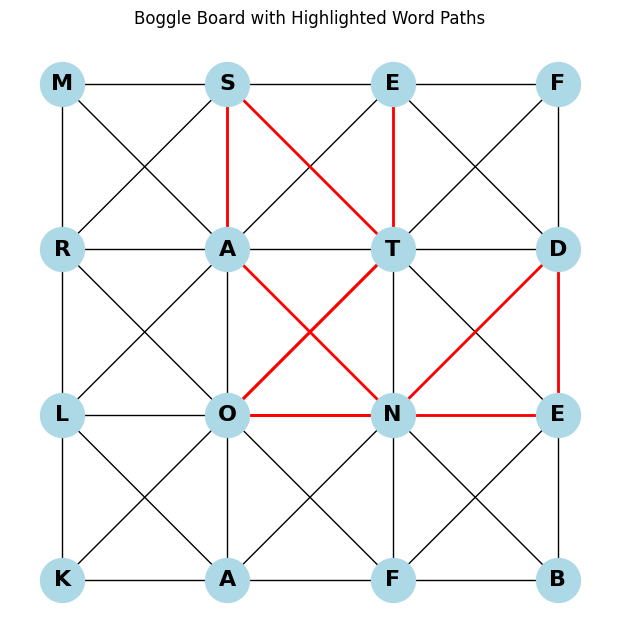

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def iterative_deepening_boggle(board, dictionary):
    """
    Find all possible words from a Boggle board using Iterative Deepening DFS.
    :param board: The 4x4 Boggle board (list of lists).
    :param dictionary: The list of valid words to search for.
    :return: A list of valid words found on the board.
    """
    rows, cols = len(board), len(board[0])
    valid_words = set()

    # Define all 8 possible directions (row, col)
    directions = [(-1, -1), (-1, 0), (-1, 1),
                  (0, -1),          (0, 1),
                  (1, -1),  (1, 0), (1, 1)]

    def is_valid(x, y, visited):
        """
        Check if a cell (x, y) is within the board and not visited.
        """
        return 0 <= x < rows and 0 <= y < cols and (x, y) not in visited

    def dfs(x, y, current_word, visited, depth, max_depth):
        """
        Perform DFS to explore all possible words starting from (x, y).
        """
        if current_word in dictionary:
            valid_words.add(current_word)

        if depth == max_depth:
            return

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                visited.add((nx, ny))
                dfs(nx, ny, current_word + board[nx][ny], visited, depth + 1, max_depth)
                visited.remove((nx, ny))

    # Iterative deepening: increase depth from 2 to 8
    for max_depth in range(2, 9):
        for i in range(rows):
            for j in range(cols):
                visited = set()
                visited.add((i, j))
                dfs(i, j, board[i][j], visited, 1, max_depth)

    return list(valid_words)

def visualize_boggle(board, valid_words):
    """
    Visualize the Boggle board and highlight the paths of valid words.
    :param board: The 4x4 Boggle board (list of lists).
    :param valid_words: The list of valid words found on the board.
    """
    rows, cols = len(board), len(board[0])
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(rows):
        for j in range(cols):
            G.add_node((i, j), label=board[i][j])

    # Add edges to the graph (connect adjacent cells, including diagonals)
    directions = [(-1, -1), (-1, 0), (-1, 1),
                  (0, -1),          (0, 1),
                  (1, -1),  (1, 0), (1, 1)]
    for i in range(rows):
        for j in range(cols):
            for dx, dy in directions:
                ni, nj = i + dx, j + dy
                if 0 <= ni < rows and 0 <= nj < cols:
                    G.add_edge((i, j), (ni, nj))

    # Create a layout for the graph
    pos = {(i, j): (j, -i) for i in range(rows) for j in range(cols)}  # Grid layout

    # Draw the graph
    plt.figure(figsize=(6, 6))
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=1000, font_size=16, font_weight='bold', node_color='lightblue')

    # Highlight the paths of valid words
    for word in valid_words:
        path = find_word_path(board, word)
        if path:
            path_edges = list(zip(path[:-1], path[1:]))
            nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.title("Boggle Board with Highlighted Word Paths")
    plt.show()

def find_word_path(board, word):
    """
    Find the path of a word on the Boggle board.
    :param board: The 4x4 Boggle board (list of lists).
    :param word: The word to find the path for.
    :return: A list of coordinates representing the path of the word.
    """
    rows, cols = len(board), len(board[0])
    directions = [(-1, -1), (-1, 0), (-1, 1),
                  (0, -1),          (0, 1),
                  (1, -1),  (1, 0), (1, 1)]

    def dfs(x, y, index, visited):
        if index == len(word):
            return visited
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited and board[nx][ny] == word[index]:
                visited.append((nx, ny))
                result = dfs(nx, ny, index + 1, visited)
                if result:
                    return result
                visited.pop()
        return None

    for i in range(rows):
        for j in range(cols):
            if board[i][j] == word[0]:
                path = dfs(i, j, 1, [(i, j)])
                if path:
                    return path
    return None

# Example usage
board = [
    ['M', 'S', 'E', 'F'],
    ['R', 'A', 'T', 'D'],
    ['L', 'O', 'N', 'E'],
    ['K', 'A', 'F', 'B']
]

dictionary = ["START", "NOTE", "SAND", "STONED"]

# Find valid words
valid_words = iterative_deepening_boggle(board, dictionary)
print("Valid words found:", valid_words)

# Visualize the Boggle board and highlight the paths of valid words
visualize_boggle(board, valid_words)